In [2]:
import numpy as np
from spec_id import Single_gal_fit, Analyze_Stack_avgage, Likelihood_contours, Gauss_dist,Error, Scale_model,\
    Stack_spec_normwmean_rfv, Stack_model_normwmean_rfv, Make_model_list,Specz_fit, Best_fit_model, Stack_spec, Stack_model
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [4]:
ids,speclist,lmass,rshift,rad,sig,comp=np.array(Readfile('masslist_mar22.dat',is_float=False))
lmass,rshift,rad,sig,comp=np.array([lmass,rshift,rad,sig,comp]).astype(float)

gid, rfv, iracm =Readfile('galaxy_mags.dat', is_float=False)
rfv, iracm=np.array([rfv, iracm]).astype(float)

IDc=[]  # low mtor sample
IDd=[]  # high mtor sample

IDmL=[]  # low mass sample
IDmH=[]  # high mass sample

for i in range(len(ids)):
    if 0.11 < comp[i]:
        IDd.append(i)
    if 0.11 > comp[i]:
        IDc.append(i)    
    if 10.931 > lmass[i]:
        IDmL.append(i)
    if 10.931 < lmass[i]:
        IDmH.append(i)

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

print len(IDc)
print len(IDd)

print len(IDmH)
print len(IDmL)

10
15
9
16
6
19
5
20


205
205
205


205


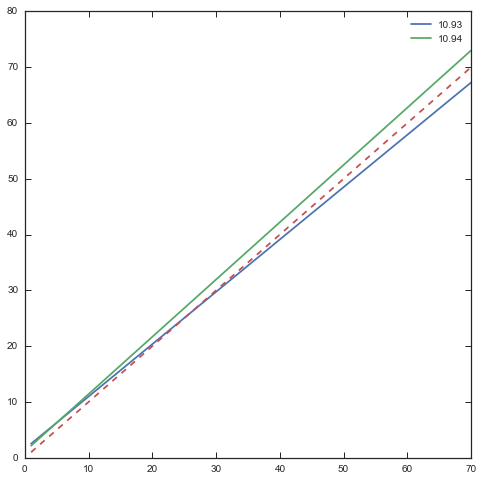

[2, 10, 11, 16, 24, 2, 6, 10, 11, 16, 24]
[0, 1, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 0, 1, 3, 4, 5, 7, 8, 9, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23]
[3100, 5390, 230]


[3100, 5390, 230]


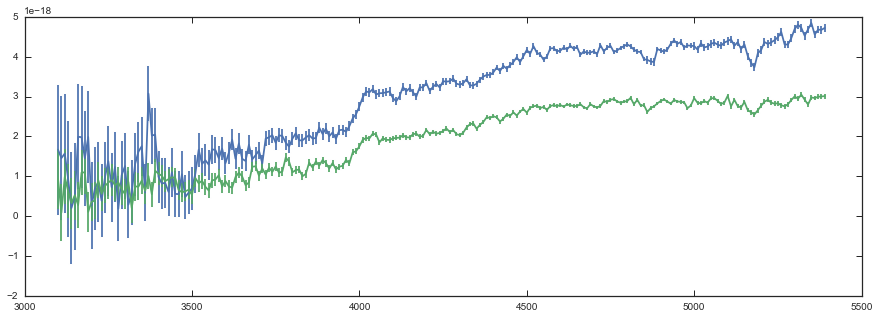

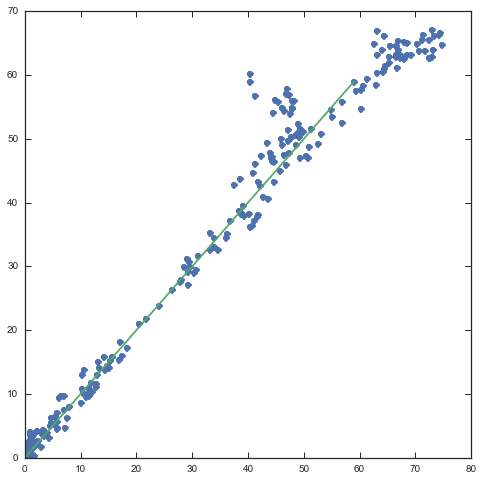

In [13]:
%matplotlib inline

massrange=np.arange(10.93,10.95,.01)

plt.figure(figsize=[8,8])
for i in range(len(massrange)):
    IDL=[]  # low mass sample
    IDH=[]  # high mass sample
    for ii in range(len(ids)):
        if massrange[i] + 0.01>lmass[ii]:
            IDL.append(ii)
        if massrange[i] + 0.01<lmass[ii]:
            IDH.append(ii)
    wv,fl,er=Stack_spec_normwmean_rfv(speclist[IDH],rshift[IDH],rfv[IDH],np.arange(3300,5350,10))
    wv2,fl2,er2=Stack_spec_normwmean_rfv(speclist[IDL],rshift[IDL],rfv[IDL],np.arange(3300,5350,10)) 
    
    print len(wv)
    print len(wv2)
    
    coeff=np.polyfit(fl/er,fl2/er2,1)
    lfit=np.polyval(coeff,[1,70])
    plt.plot([1,70],lfit,label='%s' % massrange[i])
plt.plot([1,70],[1,70],'--')
plt.legend()
plt.show()
plt.close()

for i in range(len(ids)):
    if 10.931 > lmass[i]:
        IDL.append(i)
    if 10.931 < lmass[i]:
        IDH.append(i)

print IDH
print IDL

wv,fl,er=Stack_spec_normwmean_rfv(speclist[IDH],rshift[IDH],rfv[IDH],np.arange(3100,5400,10))

wv2,fl2,er2=Stack_spec_normwmean_rfv(speclist[IDL],rshift[IDL],rfv[IDL],np.arange(3100,5400,10))

print [min(wv),max(wv),len(wv)]
print [min(wv2),max(wv2),len(wv2)]

plt.figure(figsize=[15,5])
plt.errorbar(wv,fl,er)
plt.errorbar(wv2,fl2,er2)
plt.show()
plt.close()

plt.figure(figsize=[8,8])
plt.plot(fl/er,fl2/er2,'o')
plt.plot(np.arange(60),np.arange(60))
plt.show()
plt.close()

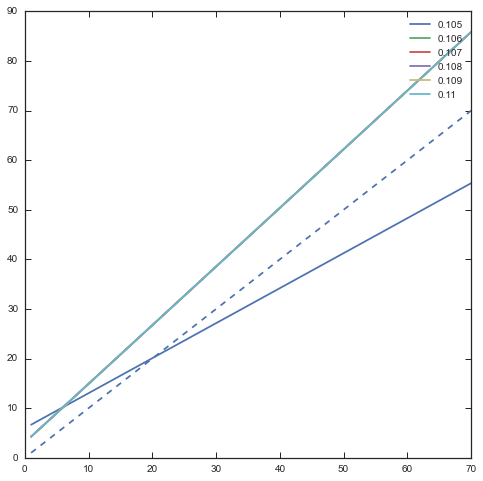

[ 0.15115782  0.21493861  0.50265284  0.82623206  0.3693668   0.56256472
  0.27861808  0.23301218  0.30158911  0.15282715  0.71570623  0.62612545
  0.67490548  0.51956007  0.31922074]
[-0.05694389  0.01128735  0.00559504 -0.10425346  0.10506033  0.10017774
 -0.34989983 -0.09105721 -0.18889442  0.00922308]
[3430, 5340, 192]


[3430, 5340, 192]


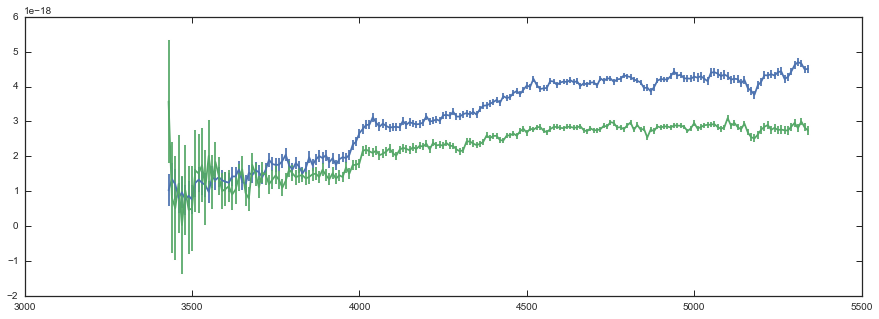

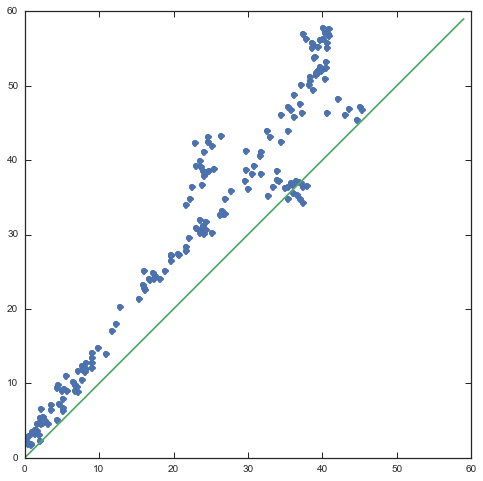

In [22]:
%matplotlib inline

comprange=np.arange(0.105,0.11,.001)

plt.figure(figsize=[8,8])
for i in range(len(comprange)):
    IDC=[]  # low mass sample
    IDD=[]  # high mass sample
    for ii in range(len(ids)):
        if comprange[i] < comp[ii]:
            IDD.append(ii)
        if comprange[i] > comp[ii]:
            IDC.append(ii)
    # print comprange[i]
    wv,fl,er=Stack_spec_normwmean_rfv(speclist[IDD],rshift[IDD],rfv[IDD],np.arange(3430,5350,10))
    # print [min(wv),max(wv),len(wv)]
    wv2,fl2,er2=Stack_spec_normwmean_rfv(speclist[IDC],rshift[IDC],rfv[IDC],np.arange(3430,5350,10)) 
    # print [min(wv2),max(wv2),len(wv2)]
    # print '---------'
    coeff=np.polyfit(fl/er,fl2/er2,1)
    lfit=np.polyval(coeff,[1,70])
    plt.plot([1,70],lfit,label='%s' % comprange[i])
plt.plot([1,70],[1,70],'--')
plt.legend()
plt.show()
plt.close()

IDC=[]  # low mass sample
IDD=[]  # high mass sample

for i in range(len(ids)):
    if 0.11 < comp[i]:
        IDD.append(i)
    if 0.11 > comp[i]:
        IDC.append(i)

print comp[IDD]
print comp[IDC]

wv,fl,er=Stack_spec_normwmean_rfv(speclist[IDD],rshift[IDD],rfv[IDD],np.arange(3430,5350,10))

wv2,fl2,er2=Stack_spec_normwmean_rfv(speclist[IDC],rshift[IDC],rfv[IDC],np.arange(3430,5350,10)) 

print [min(wv),max(wv),len(wv)]
print [min(wv2),max(wv2),len(wv2)]

plt.figure(figsize=[15,5])
plt.errorbar(wv2,fl2,er2)
plt.errorbar(wv,fl,er)
plt.show()
plt.close()

plt.figure(figsize=[8,8])
plt.plot(fl/er,fl2/er2,'o')
plt.plot(np.arange(60),np.arange(60))
plt.show()
plt.close()

In [5]:
# goodsn=Table.read('/Users/vestrada/Downloads/allfields/goodsn/goodsn_3dhst.v4.1_f125w.galfit', format='ascii')
# goodss=Table.read('/Users/vestrada/Downloads/allfields/goodss/goodss_3dhst.v4.1_f125w.galfit', format='ascii')

goodsn=Table.read('/Users/Vince.ec/Clear_data/galaxy_meas/goodsn_3dhst.v4.1_f125w.galfit', format='ascii')
goodss=Table.read('/Users/Vince.ec/Clear_data/galaxy_meas/goodss_3dhst.v4.1_f125w.galfit', format='ascii')

In [6]:
def Galaxy_rad_in_kpc(redshift,size_in_arcseconds):
    c=3E5
    H0=71E-3
    Dh=c/H0
    Om=0.27
    Ok=8.24E-5
    Ol=0.73
    z=np.arange(0,2.2,.01)
    Ez=np.sqrt(Om*(1+z)**3+Ok*(1+z)**2+Ol)

    Dm=np.zeros(len(z))
    for i in range(len(z)):
        Dm[i]=Dh*np.trapz(1/Ez[0:i+1],z[0:i+1])
    Da=Dm/(1+z)
    size_in_rad=size_in_arcseconds*4.848E-6
    size_kpc=np.zeros(len(redshift))
    for i in range(len(redshift)):
        dist_kpc = Da*size_in_rad[i]
        size_kpc[i]=interp1d(z,dist_kpc)(redshift[i])
    return size_kpc

n=np.zeros(len(ids))
re=np.zeros(len(ids))
q=np.zeros(len(ids))

for i in range(len(ids)):
    if ids[i][0] == 'n':
        num=int(ids[i][1:])
        n[i] = goodsn[np.argwhere(goodsn['NUMBER']==num)]['n']
        re[i] = goodsn[np.argwhere(goodsn['NUMBER']==num)]['re']
        q[i] = goodsn[np.argwhere(goodsn['NUMBER']==num)]['q']
    if ids[i][0] == 's':
        num=int(ids[i][1:])
        n[i] = goodss[np.argwhere(goodss['NUMBER']==num)]['n']
        re[i] = goodss[np.argwhere(goodss['NUMBER']==num)]['re']
        q[i] = goodss[np.argwhere(goodss['NUMBER']==num)]['q']

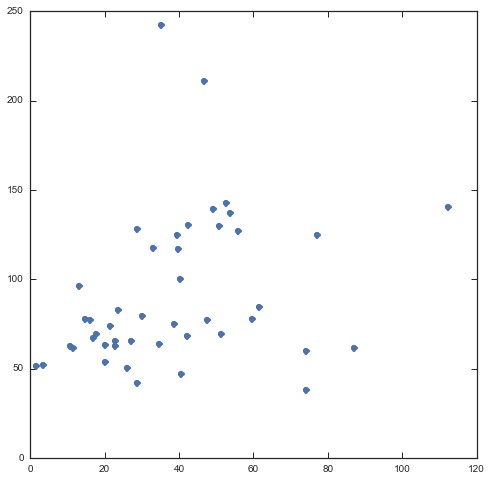

In [23]:
%matplotlib inline

Kv=(73.32)/(10.465+(n-0.094)**2)+0.0954
G=6.674E-11                                         # m^3 kg^-1 s^-2
mass=np.power(10,lmass)*1.988E30
r=Galaxy_rad_in_kpc(rshift,re*np.sqrt(q)) * 3.086E19 # in m
top=G*mass
bottom=.0557*Kv*r
sig=np.sqrt(top/bottom)*1E-3/10

plt.figure(figsize=[8,8])
plt.plot(mtor,sig,'o')
plt.show()
plt.close()

[84 85]
[5, 6, 13, 20, 21, 22, 23, 24, 25, 28, 31, 32, 34, 40]
[0, 2, 7, 8, 9, 11, 15, 16, 17, 19, 26, 30, 33, 37, 38, 39, 41, 42, 44]


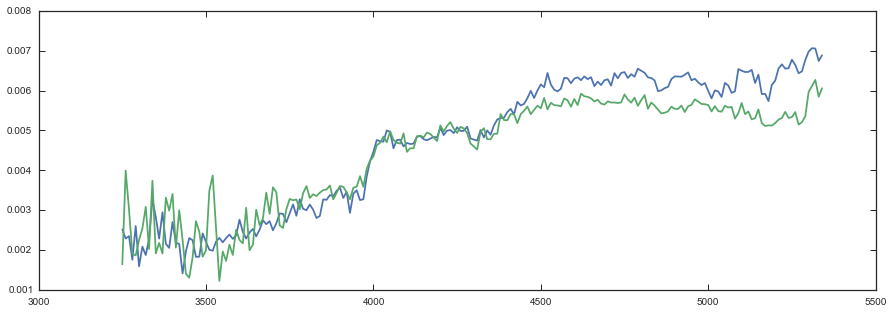

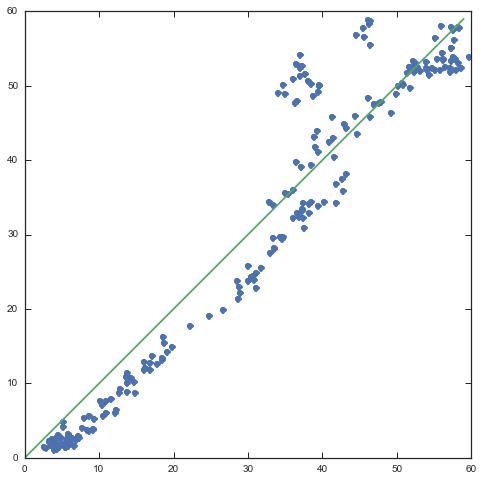

In [64]:
%matplotlib inline

IDL=[]  # low mass sample
IDH=[]  # high mass sample

mrange = np.arange(84,86,1)
print mrange

# plt.figure(figsize=[8,8])
# for i in range(len(mrange)):
#     IDL=[]
#     IDH=[]  
#     for ii in range(len(ids)):
#         if mrange[i]>sig[ii] and 1<rshift[ii]<1.75:
#             IDL.append(ii)
#         if mrange[i]<sig[ii] and 1<rshift[ii]<1.75:
#             IDH.append(ii)
#     wv,fl,er=Stack_spec_normwmean(speclist[IDH],rshift[IDH],np.arange(3250,5350,10))
#     wv2,fl2,er2=Stack_spec_normwmean(speclist[IDL],rshift[IDL],np.arange(3250,5350,10))
#     coeffs = np.polyfit(fl/er,fl2/er2,1)
#     lfit = np.polyval(coeffs,np.arange(60))
#     plt.plot(np.arange(60),lfit)
# plt.plot(np.arange(60),np.arange(60),'o')
# plt.show()
# plt.close()
    
for i in range(len(ids)):
    if 86>sig[i] and 1<rshift[i]<1.75:
        IDL.append(i)
    if 86<sig[i] and 1<rshift[i]<1.75:
        IDH.append(i)  

print IDH
print IDL

wv,fl,er=Stack_spec_normwmean(speclist[IDH],rshift[IDH],np.arange(3250,5350,10))
# mlist=Make_model_list(ids[IDH],0.0132,3.5,0,rshift[IDH])
# mwv,mfl=Stack_model(speclist[IDH],mlist,rshift[IDH],np.arange(3250,5350,10))

wv2,fl2,er2=Stack_spec_normwmean(speclist[IDL],rshift[IDL],np.arange(3250,5350,10))

dat=Table([ids,speclist,lmass,rshift,flxr,sig],names=['ID','filename','lmass','rshift','radius','v_disp'])
ascii.write(dat,'masslist_feb26.dat')


plt.figure(figsize=[15,5])
plt.plot(wv,fl)
# plt.axhline(1,linestyle='--')
# plt.plot(mwv,mfl)
plt.plot(wv2,fl2)
plt.show()
plt.close()

plt.figure(figsize=[8,8])
plt.plot(fl/er,fl2/er2,'o')
plt.plot(np.arange(60),np.arange(60))
plt.show()
plt.close()

In [8]:
%matplotlib inline

def Galaxy_rad_in_kpc(redshift,size_in_arcseconds):
    c=3E5
    H0=71E-3
    Dh=c/H0
    Om=0.27
    Ok=8.24E-5
    Ol=0.73
    z=np.arange(0,2.2,.01)
    Ez=np.sqrt(Om*(1+z)**3+Ok*(1+z)**2+Ol)

    Dm=np.zeros(len(z))
    for i in range(len(z)):
        Dm[i]=Dh*np.trapz(1/Ez[0:i+1],z[0:i+1])
    Da=Dm/(1+z)
    size_in_rad=size_in_arcseconds*4.848E-6
    size_kpc=np.zeros(len(redshift))
    for i in range(len(redshift)):
        dist_kpc = Da*size_in_rad[i]
        size_kpc[i]=interp1d(z,dist_kpc)(redshift[i])
    return size_kpc

actrad=Galaxy_rad_in_kpc(rshift,rad)

masses=np.power(10,np.arange(10,11.4,.1))

print np.power(10,.22)

rp=np.power(10,0.22)*(masses/7E10)**(0.7)
rpt=np.power(10,0.22)*(np.power(10,lmass)/7E10)**(0.7)
compactness=np.log10(actrad/rpt)

plt.figure(figsize=[8,8])
plt.plot(lmass[IDc],compactness[IDc],'ro',label='Compact')
plt.plot(lmass[IDd],compactness[IDd],'o',label='Diffuse')
plt.axhline(0,linestyle='--',color='#24ab00',label='r$_{pred} $')
plt.axhline(0.14,color='#24ab00',label='Limit used to\n get equal S/N')
plt.xlabel('Mass Log(M$_\odot$)',size=20)
plt.ylabel('Log(r$_{eff}$/r$_{pred}) $',size=20)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.legend(fontsize=15)
# plt.show()
plt.savefig('../important_plots/object_select2.png')
plt.close()

plt.figure(figsize=[8,8])
plt.plot(lmass[IDA],np.log10(actrad[IDA]),'o')
plt.plot(np.log10(masses),np.log10(rp),color='#24ab00',label='r$_{pred} $')
plt.ylabel('r$_{eff}$  Log(kpc)',size=20)
plt.xlabel('Mass Log(M$_\odot$)',size=20)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.legend(fontsize=20)
# plt.show()
plt.savefig('../important_plots/object_select1.png')
plt.close()

1.65958690744


[ 10.83  11.16  10.89  11.09  11.09  10.87  11.12  10.91  11.01  10.92
  11.18  10.96  10.85  11.21]


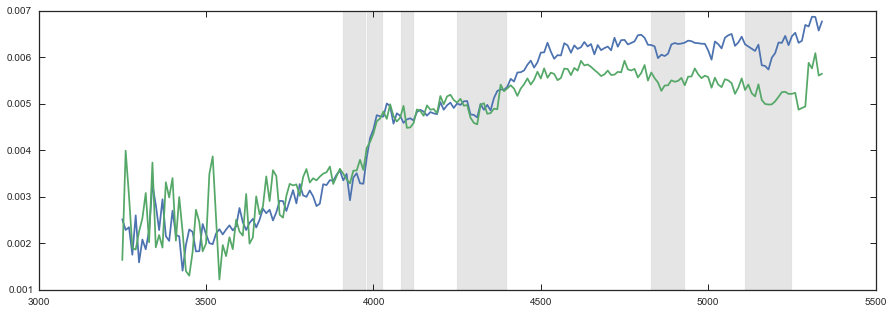

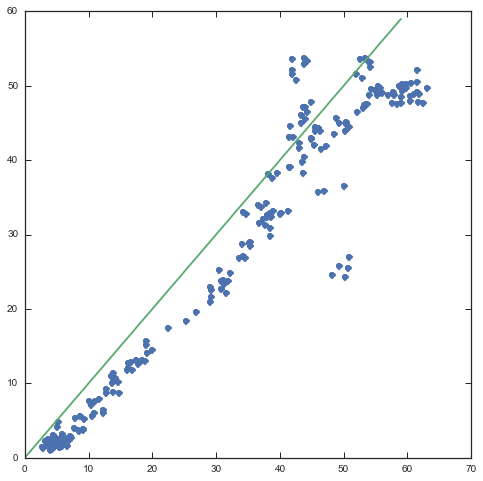

In [5]:
compactness=np.log10(actrad/rpt)
IDA=[]
IDd=[]
IDc=[]

for i in range(len(ids)):
    if 1 < rshift[i] < 1.75:
        IDA.append(i)
    if 0.14 < compactness[i] and 1 < rshift[i] < 1.75:
        IDd.append(i)
    if 0.14 > compactness[i] and 1 < rshift[i] < 1.75:
        IDc.append(i)
     
print lmass[IDc]
        
wv,fl,er=Stack_spec_normwmean(speclist[IDc],rshift[IDc],np.arange(3250,5350,10))
wv2,fl2,er2=Stack_spec_normwmean(speclist[IDd],rshift[IDd],np.arange(3250,5350,10))

plt.figure(figsize=[15,5])
plt.plot(wv,fl)
plt.plot(wv2,fl2)
plt.axvspan(3910, 3979, color='k', alpha=.1)
plt.axvspan(3981, 4030, color='k', alpha=.1)
plt.axvspan(4082, 4122, color='k', alpha=.1)
plt.axvspan(4250, 4400, color='k', alpha=.1)
plt.axvspan(4830, 4930, color='k', alpha=.1)
plt.axvspan(5109, 5250, color='k', alpha=.1)
plt.show()
plt.close()

plt.figure(figsize=[8,8])
plt.plot(fl/er,fl2/er2,'o')
plt.plot(np.arange(60),np.arange(60))
plt.show()
plt.close()

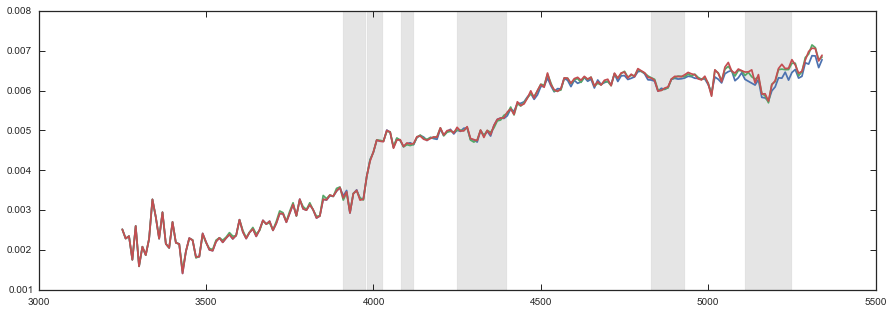

In [31]:
rwv,rfl,rer=Stack_spec_normwmean(speclist[IDrH],rshift[IDrH],np.arange(3250,5350,10))
swv,sfl,ser=Stack_spec_normwmean(speclist[IDsH],rshift[IDsH],np.arange(3250,5350,10))


plt.figure(figsize=[15,5])
plt.plot(wv,fl)
plt.plot(rwv,rfl)
plt.plot(swv,sfl)
plt.axvspan(3910, 3979, color='k', alpha=.1)
plt.axvspan(3981, 4030, color='k', alpha=.1)
plt.axvspan(4082, 4122, color='k', alpha=.1)
plt.axvspan(4250, 4400, color='k', alpha=.1)
plt.axvspan(4830, 4930, color='k', alpha=.1)
plt.axvspan(5109, 5250, color='k', alpha=.1)
plt.show()
plt.close()

[ 3.3  3.4]
[  1.48453074   0.99814391   1.42065126   1.06621643   1.14738371
   2.82955876   2.26136145   2.08970129   3.95056282   7.61488644
   7.31279431   4.52687157   2.98969444   1.80728402   2.86544717
   1.85180856   4.02244306   6.2086345   65.07456666   3.33464385
   1.93721537   3.13683516   2.17575059   1.70483991   2.21026094
   0.82324963   2.31217382   3.13624591   1.75539217   2.17914377
   2.66230937   1.21209582   2.05277445   5.02501781   2.20726847
   2.82040471  26.54237643   4.02306286   5.80691527   8.17215992
   1.70865528   3.84837401   1.62551671   4.77465005   4.51494135]


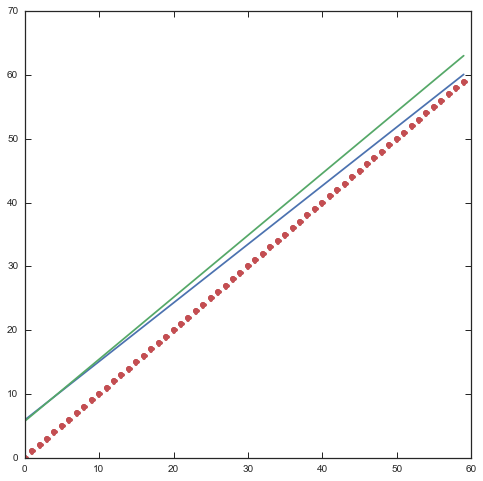

In [59]:
mrange = np.arange(3.3,3.4,.1)
print mrange

print actrad

plt.figure(figsize=[8,8])
for i in range(len(mrange)):
    IDL=[]
    IDH=[]  
    for ii in range(len(ids)):
        if mrange[i]>actrad[ii] and 1<rshift[ii]<1.75:
            IDL.append(ii)
        if mrange[i]<actrad[ii] and 1<rshift[ii]<1.75:
            IDH.append(ii)
    wv,fl,er=Stack_spec_normwmean(speclist[IDH],rshift[IDH],np.arange(3250,5350,10))
    wv2,fl2,er2=Stack_spec_normwmean(speclist[IDL],rshift[IDL],np.arange(3250,5350,10))
    coeffs = np.polyfit(fl/er,fl2/er2,1)
    lfit = np.polyval(coeffs,np.arange(60))
    plt.plot(np.arange(60),lfit)
plt.plot(np.arange(60),np.arange(60),'o')
plt.show()
plt.close()

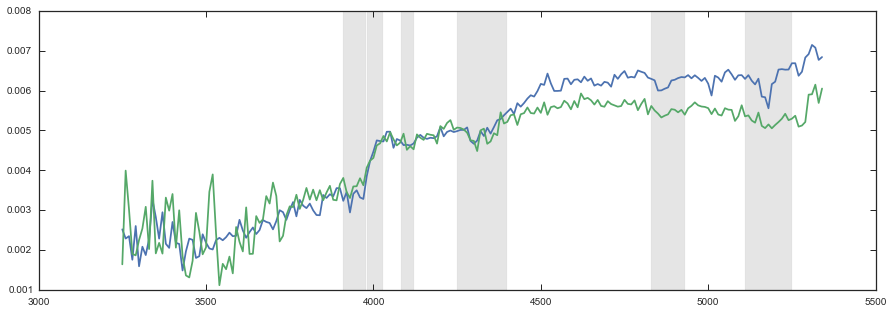

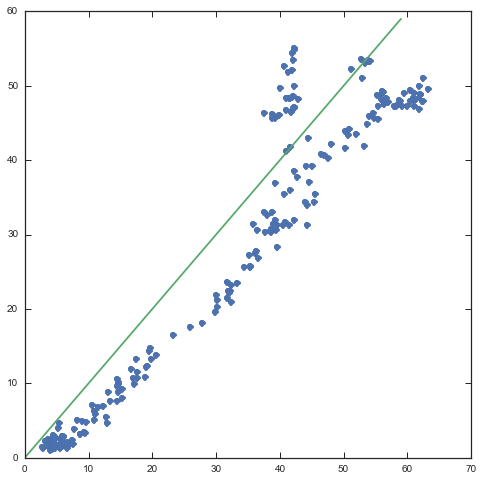

In [69]:
compactness=np.log10(actrad/rpt)
IDradL=[]
IDradH=[]

for i in range(len(ids)):
    if 3.4 < actrad[i] and 1 < rshift[i] < 1.75:
        IDradH.append(i)
    if 3.4 > actrad[i] and 1 < rshift[i] < 1.75:
        IDradL.append(i)
             
wv,fl,er=Stack_spec_normwmean(speclist[IDradL],rshift[IDradL],np.arange(3250,5350,10))
wv2,fl2,er2=Stack_spec_normwmean(speclist[IDradH],rshift[IDradH],np.arange(3250,5350,10))

plt.figure(figsize=[15,5])
plt.plot(wv,fl)
plt.plot(wv2,fl2)
plt.axvspan(3910, 3979, color='k', alpha=.1)
plt.axvspan(3981, 4030, color='k', alpha=.1)
plt.axvspan(4082, 4122, color='k', alpha=.1)
plt.axvspan(4250, 4400, color='k', alpha=.1)
plt.axvspan(4830, 4930, color='k', alpha=.1)
plt.axvspan(5109, 5250, color='k', alpha=.1)
plt.show()
plt.close()

plt.figure(figsize=[8,8])
plt.plot(fl/er,fl2/er2,'o')
plt.plot(np.arange(60),np.arange(60))
plt.show()
plt.close()

In [ ]:
dat=Table([ids,speclist,lmass,rshift,rad,sig,compactness],names=['ids','filename','lmass','rshift','radius','v_dispersion','compactness'])
ascii.write(dat,'masslist_feb28.dat')